## Seaborn-Pokemon

In this Jupyter Notebook I will reproduce the Seaborn-Pokemon tutorial that you can find in:
https://elitedatascience.com/python-seaborn-tutorial

In [1]:
# Let's import all we need for this tutorial.

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Notice that in my case I had to use, in order to read the csv, the feature 'encoding = "ISO-8859-1"'.
# I solved this problem thanks to this Stackoverflow's thread:
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

file = pd.read_csv('./pokemon.csv', index_col=0,  encoding = "ISO-8859-1")
df   = pd.DataFrame(file)
df

Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
#                                                                        
1     Bulbasaur    Grass  Poison    318   45      49       49       65   
2       Ivysaur    Grass  Poison    405   60      62       63       80   
3      Venusaur    Grass  Poison    525   80      82       83      100   
4    Charmander     Fire     NaN    309   39      52       43       60   
5    Charmeleon     Fire     NaN    405   58      64       58       80   
..          ...      ...     ...    ...  ...     ...      ...      ...   
147     Dratini   Dragon     NaN    300   41      64       45       50   
148   Dragonair   Dragon     NaN    420   61      84       65       70   
149   Dragonite   Dragon  Flying    600   91     134       95      100   
150      Mewtwo  Psychic     NaN    680  106     110       90      154   
151         Mew  Psychic     NaN    600  100     100      100      100   

     Sp. Def  Speed  Stage  Legendary  
#                                      
1         65     45      1      False  
2         80     60      2      False  
3        100     80      3      False  
4         50     65      1      False  
5         65     80      2      False  
..       ...    ...    ...        ...  
147       50     50      1      False  
148       70     70      2      False  
149      100     80      3      False  
150       90    130      1       True  
151      100    100      1      False  

[151 rows x 12 columns]

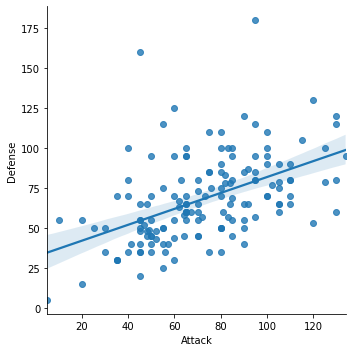

In [3]:
# Quick way to show a scatter plot.
sns.lmplot(x='Attack', y='Defense', data=df)

# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

But this is not good enough. I'm going to tweek some of the features of the lmplot function.

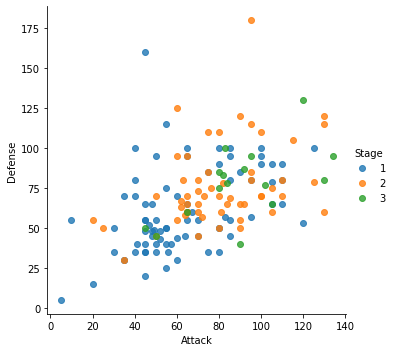

In [4]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

# Here they are fine, but imagine each axis doesnt start at 0 but -20. I can tweak using Matplotlib:
# plt.ylim(0, None)
# plt.xlim(0, None)

Seaborn allows me to use directly Pandas as an input.

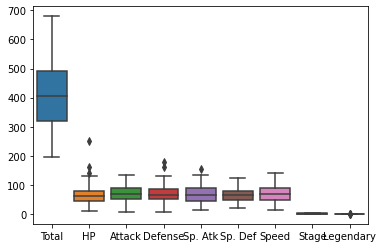

In [5]:
# Boxplot
sns.boxplot(data=df)

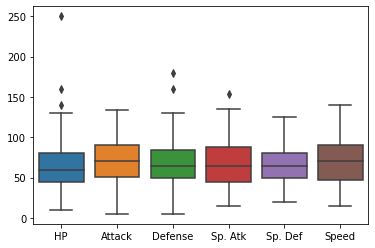

In [6]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

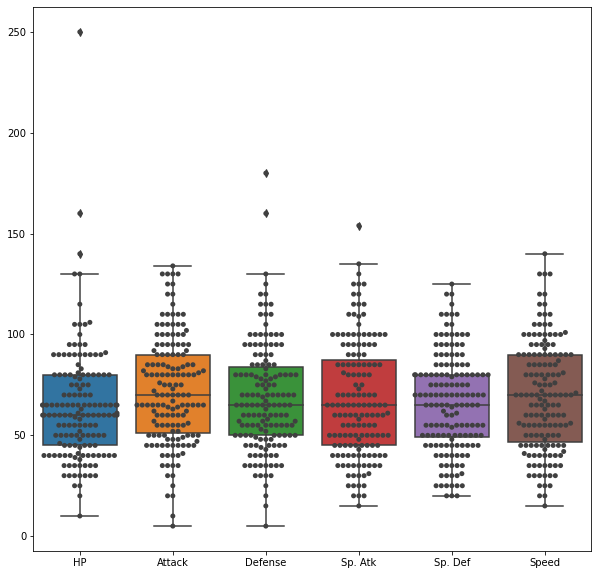

In [7]:
#I want to see the points in this data also.
plt.figure(figsize=(10,10)) #remember to use this command to increase the size of the figure
ax = sns.boxplot(data=stats_df)
ax = sns.swarmplot(data=stats_df, color=".25")

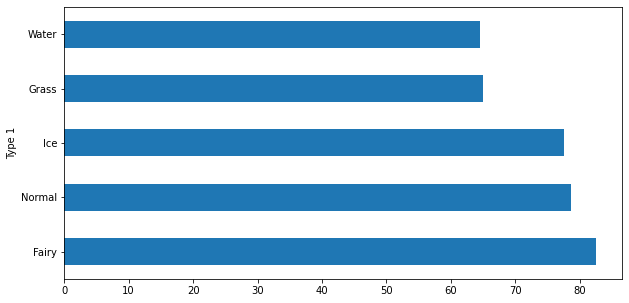

In [8]:
#Lets make some TOPs. People love tops.
df_types = stats_df.groupby(['Type 1'])
df_types['HP'].mean().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10,5))

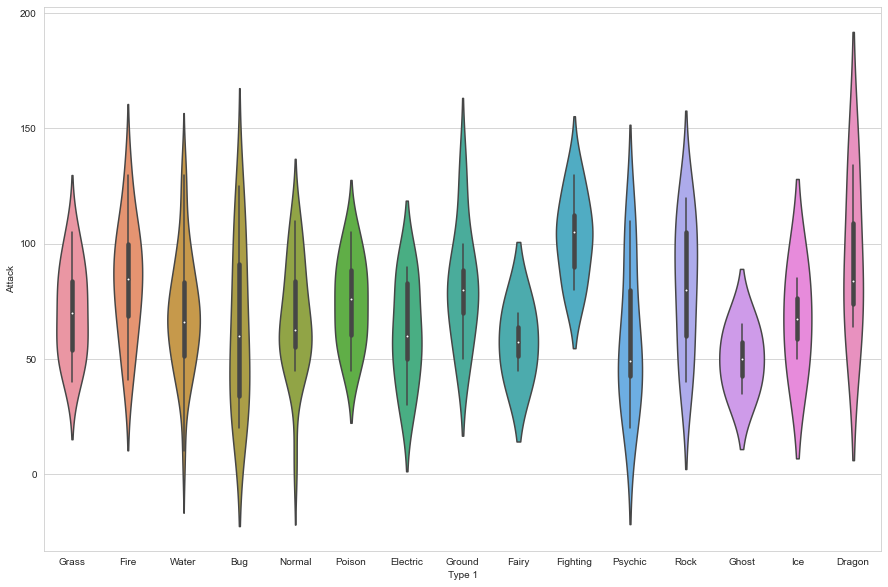

In [9]:
plt.figure(figsize=(15,10))

# Set theme

sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

Let's apply the real pokemon's type colors that we can get from Bulbapedia.

In [10]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

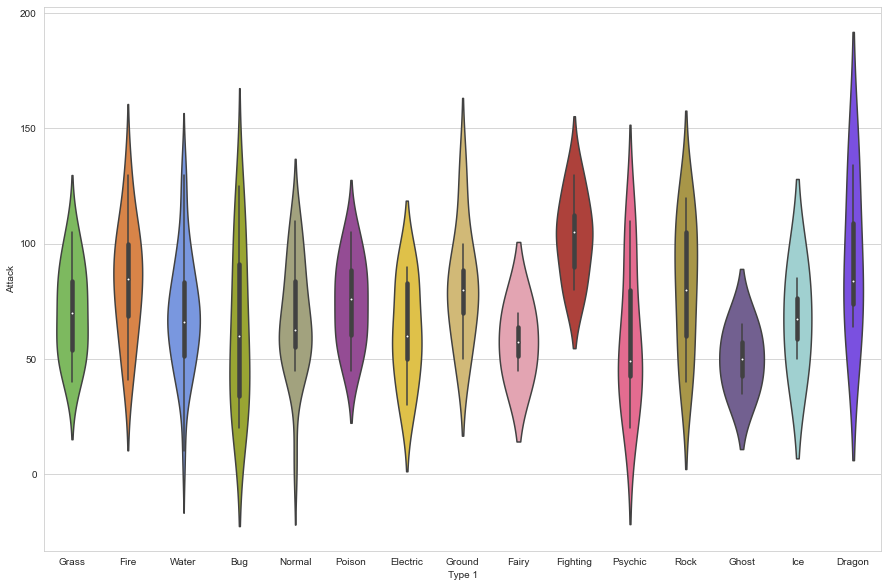

In [11]:
# Violin plot with Pokemon color palette
plt.figure(figsize=(15,10))
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

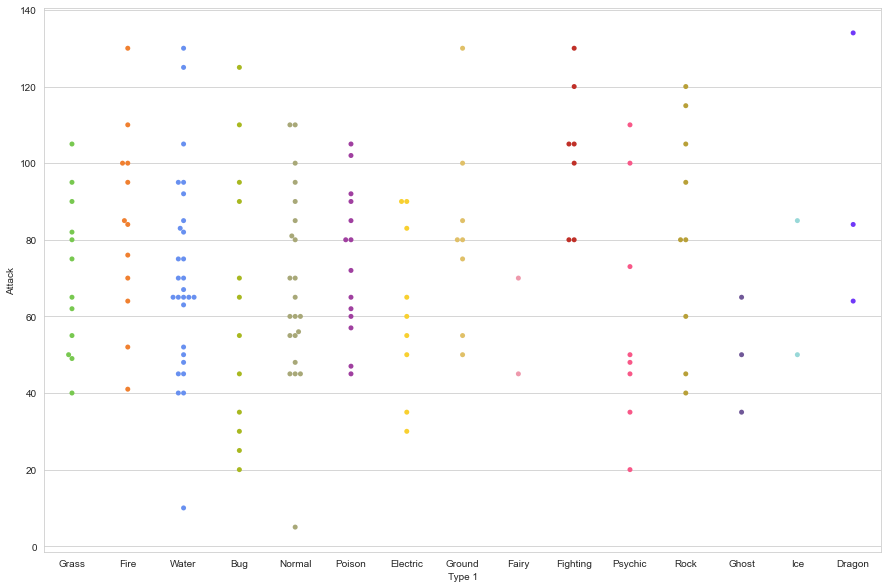

In [12]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(15,10))
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Let's combine them, both violin plot and swarnplot.

Text(0.5, 1.0, 'Attack by Type')

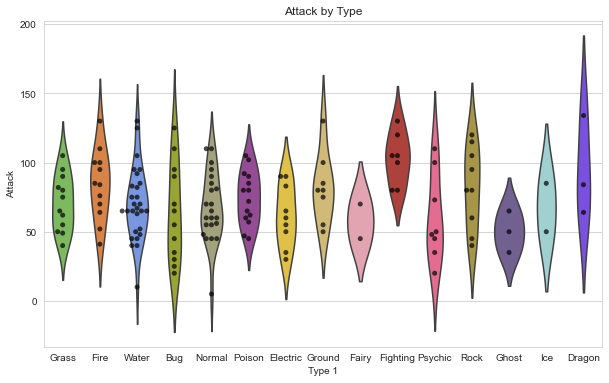

In [13]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

Now we are going to melt our data to make a nice vizualization.

In [14]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58

As you can see, what melt does is to reduce the number of columns and convert all those columns results in values for the new column you create ('Stat' in this case).

In [28]:
print(melted_df.shape)
melted_df[150:160]

(906, 5)


Name   Type 1  Type 2    Stat  value
150         Mew  Psychic     NaN      HP    100
151   Bulbasaur    Grass  Poison  Attack     49
152     Ivysaur    Grass  Poison  Attack     62
153    Venusaur    Grass  Poison  Attack     82
154  Charmander     Fire     NaN  Attack     52
155  Charmeleon     Fire     NaN  Attack     64
156   Charizard     Fire  Flying  Attack     84
157    Squirtle    Water     NaN  Attack     48
158   Wartortle    Water     NaN  Attack     63
159   Blastoise    Water     NaN  Attack     83

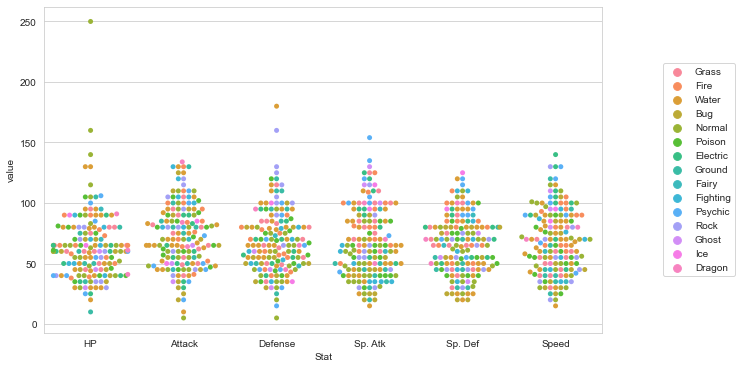

In [43]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
g = sns.swarmplot(x='Stat', y='value', data=melted_df, hue = 'Type 1')

# Here I nedeeded to put the legend on the right side, since the regular function was
# printing the legend in the middle.
# So, first of all I had to assign everything to a variable.
g.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), ncol=1)


We can try again and make everything nicer.

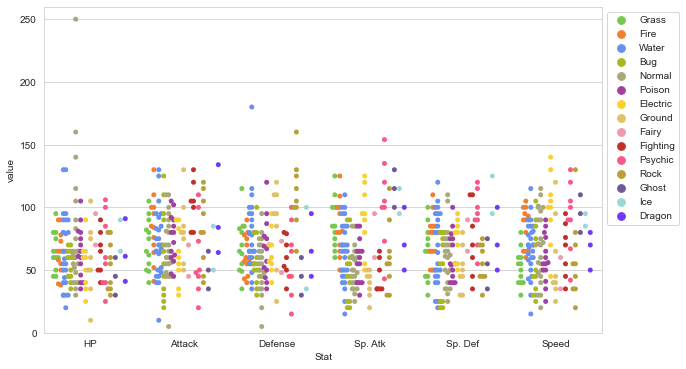

In [45]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Wow, the previous cell took long! More than 30 seconds. Maybe I should avoid this approach.

Whatever. More fancy stuff! 

# Heatmap

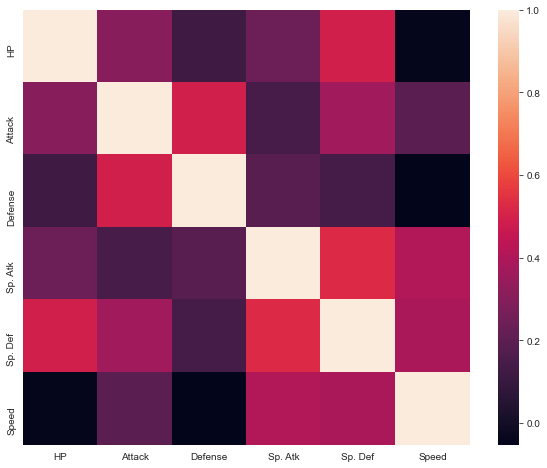

In [51]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr)

# Histogram

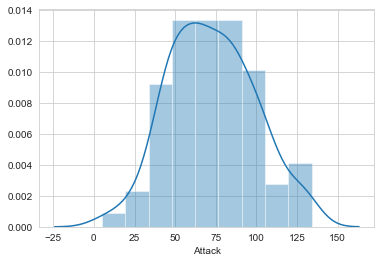

In [52]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

# Bar plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

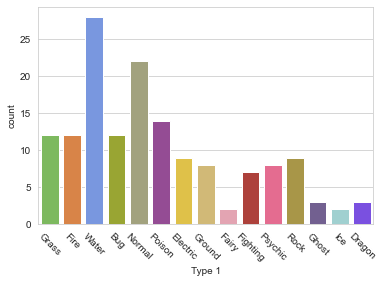

In [53]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

# Factor plot

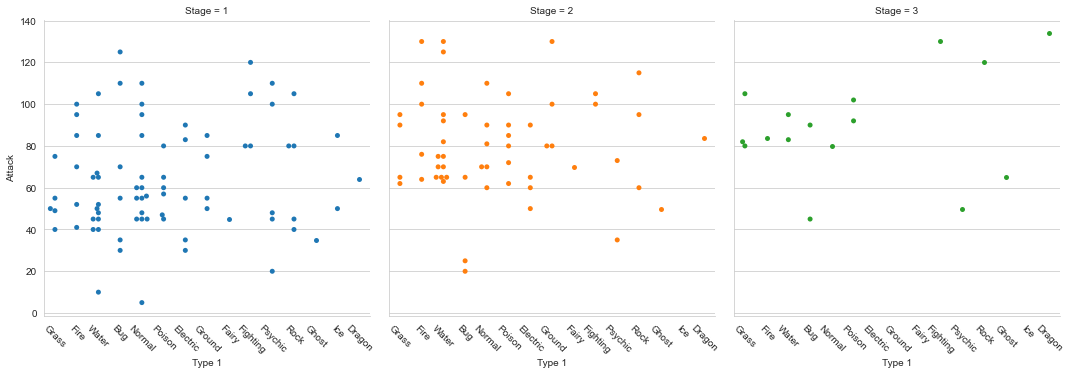

In [62]:
# Factor Plot
g = sns.catplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

# Join distribution plot

<Figure size 720x720 with 0 Axes>

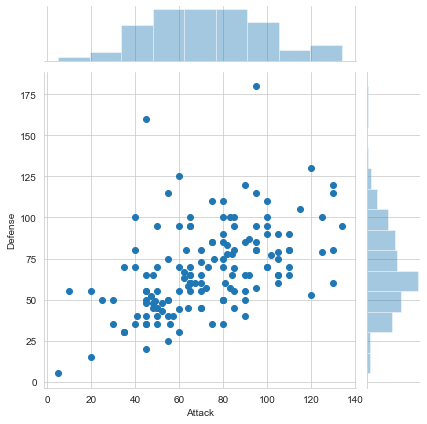

In [66]:
# Joint Distribution Plot
plt.figure(figsize=(10,10))

sns.jointplot(x='Attack', y='Defense', data=df)